<div class="frontmatter text-center">
<h2> Scientific Python, Fall 2017</h2>
<h2> Roberta Sinatra, Johannes Wachs<h2>
<h3> Homework 5 as of October 24, 2017</h2>
<h3> Tural Karimli<h2>
</div>

### From extra notebook

Can you frame the face with a black locket? 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

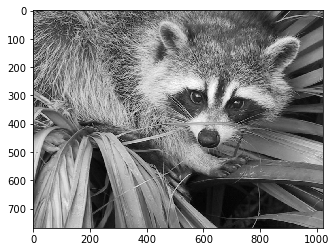

In [8]:
face = misc.face(gray=True)
plt.imshow(face, cmap=plt.cm.gray)   
plt.show()

In [9]:
crop_face = face[100:-100, 100:-100]

In [12]:
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx]

In [13]:
y.shape, x.shape

((768, 1), (1, 1024))

In [14]:
centerx, centery = (660, 300) # center of the image
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2 # circle

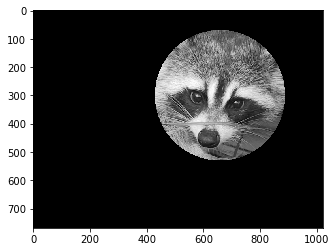

In [17]:
face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

Reference: http://www.scipy-lectures.org/intro/numpy/exercises.html

### From Class 8

##### 1) Choose a wikipedia page. For each neighbor of the page, get all of its links, keeping only those present in the list of neighbors of the ego. Add each link as a directed edge to your graph.

In [22]:
import matplotlib
%matplotlib inline

In [23]:
import networkx as nx

In [24]:
import re
import urllib.request

In [25]:
def get_links(url):
    '''pass a url and return a list of wikipedia links'''
    request = urllib.request.Request(url)
    result = urllib.request.urlopen(request)
    base=result.read()
    base=str(base)
    splitting=base.split('<a href=') 
    links=[]
    for nn in splitting:
        #use a regular expression to pick out the wikipedia internal links
        link=[x for x in re.findall('"([^"]*)"',nn) if x[0:5]=='/wiki']
        if len(link)>0:
            #links containing : are general wikipedia pages that we want to skip
            if ':' in link[0]:
                pass
            else:
                links.append('https://en.wikipedia.org'+link[0])
    #take the set to remove duplicates
    return list(set(links))

In [56]:

base_page = 'https://en.wikipedia.org/wiki/Behavioral_economics'

#get the neighbors of your base page
first_neighbors = get_links(base_page)

#create a networkx DiGraph object and add the edges from the base_page to the neighbors
D=nx.DiGraph()
for page in first_neighbors:
    D.add_edge(base_page,page)

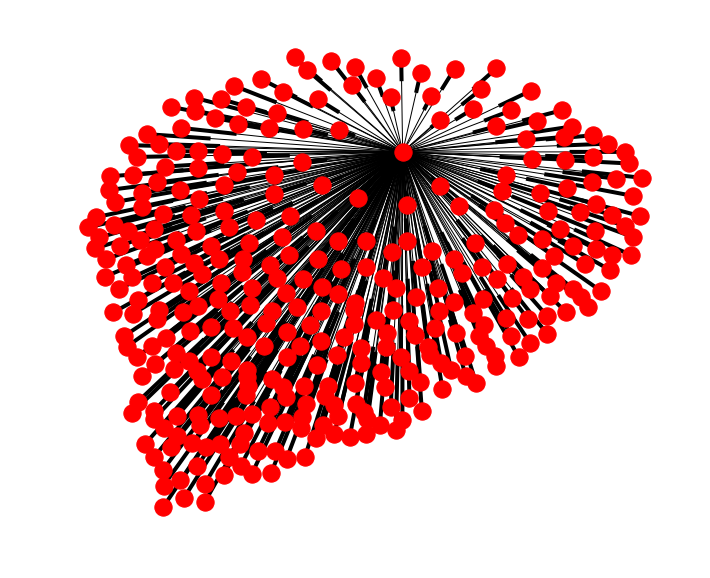

In [57]:
plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(D, with_labels=False)
plt.show()

#### 2) Look up the PageRank algorithm in the networkx documentation. Run it and see which nodes are most important according to this measure. Create a scatterplot where you use in-degree on one axis, and pagerank on the other axis. 

In [47]:
D_degrees=nx.degree(D)
D_degrees=np.array(list(D_degrees.values()))

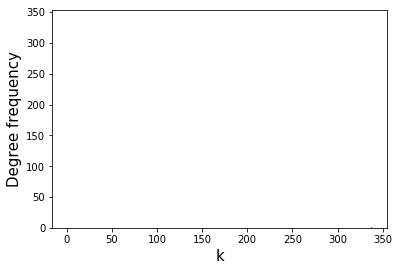

In [49]:
plt.hist(D_degrees, bins=max(D_degrees)-min(D_degrees))
plt.xlabel('k', fontsize=15)
plt.ylabel('Degree frequency', fontsize=15)

In [61]:
pr = nx.pagerank(D, alpha=0.85) # Here I cannot understand what is the ranking of the page.

##### 4) Create a BA graph of 100 nodes and with $m=3$ using the built in networkx function. Set an attribute size for each node proportional to the degree of the node. Visualize the graph using for nodes the size set in the attribute. 

In [52]:
ba=nx.barabasi_albert_graph(100,5)

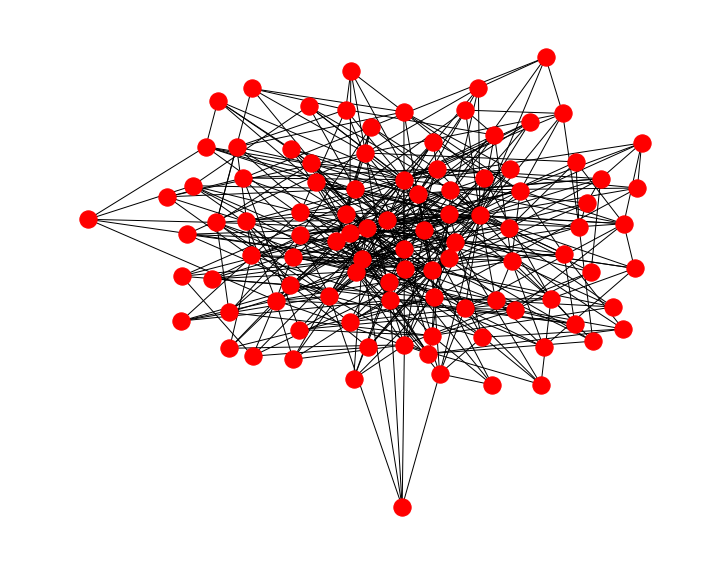

In [53]:
plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(ba, with_labels=False)
plt.show()

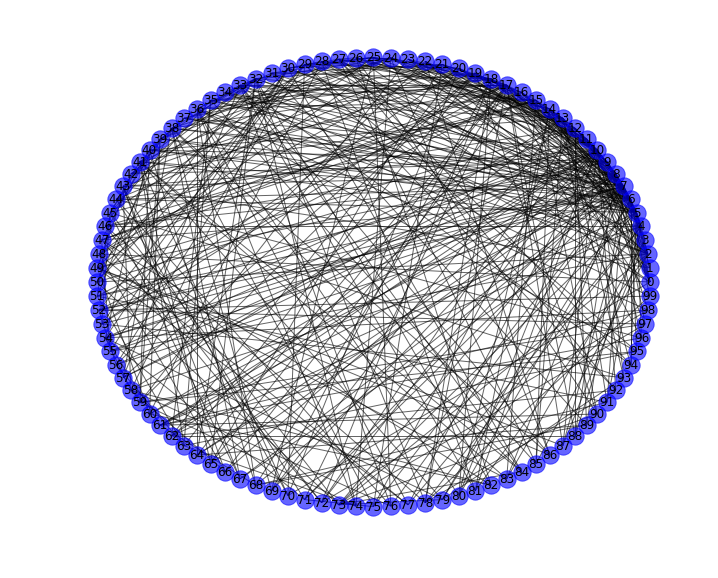

In [55]:
fig=plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(ba,pos=nx.circular_layout(ba), node_color='b', alpha=0.6)